In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#leer el data
data = pd.read_csv('octavos_df.csv')
data.head()

,Equipo 1,Equipo 2,Temporada,goles_1,goles_2,goles_ida_1,goles_ida_2,goles_vuelta_2,goles_vuelta_1
0,Leipzig,Manchester City,22/23,1,8,1,1,0,7
1,Brujas,Benfica,22/23,1,7,0,2,1,5
2,Liverpool,Real Madrid,22/23,2,6,2,5,0,1
3,Milan,Tottenham Hotspur,22/23,1,0,1,0,0,0
4,Eintracht Fráncfort,Napoli,22/23,0,5,0,2,0,3


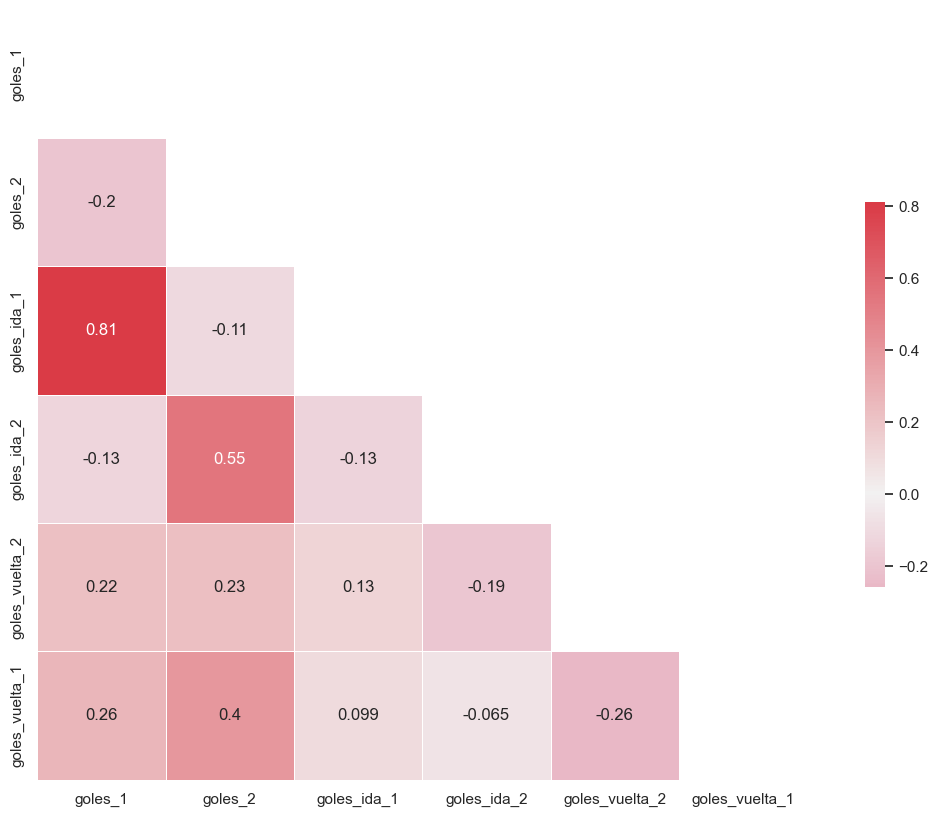

In [11]:
# Seleccionar solo las columnas numéricas
columnas_numericas = data.select_dtypes(include='number')

# Calcular la matriz de correlación
matriz_correlacion = columnas_numericas.corr()

# Crear el mapa de calor
plt.figure(figsize=(15, 10))
sns.set(style='white')

mask = np.triu(np.ones_like(matriz_correlacion, dtype=bool))
cmap = sns.diverging_palette(0, 10, as_cmap=True)

sns.heatmap(matriz_correlacion,
            mask=mask,
            cmap=cmap,
            center=0,
            square=True,
            annot=True,
            linewidths=0.5,
            cbar_kws={'shrink': 0.5})

plt.show()



In [13]:
#Las columnas no numéricas 'Equipo 1', 'Equipo 2' y 'Temporada' las paso a numéricas
#A cada equipos le asignaremos un número diferente (nuestro id) y para la temporada nos quedamos con el segundo año

import csv

equipos = set(data['Equipo 1']).union(set(data['Equipo 2']))
equipos_id = {equipo: i for i, equipo in enumerate(equipos)}

# Especificar el nombre del archivo CSV donde guardar la correspondencia
file_name = 'equipos.csv'

# Crear y escribir el archivo CSV
with open(file_name, 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    
    # Escribir el encabezado
    writer.writerow(['Equipo', 'ID'])
    
    # Escribir cada equipo y su ID
    for equipo, id_equipo in equipos_id.items():
        writer.writerow([equipo, id_equipo])

print(f'Se guardó la correspondencia en {file_name}')

Se guardó la correspondencia en equipos.csv


In [14]:
#Una vez creados los ids hacemos el cambio en las columnas no numéricas

data['Equipo 1'] = data['Equipo 1'].map(equipos_id)
data['Equipo 2'] = data['Equipo 2'].map(equipos_id)
data['Temporada'] = data['Temporada'].apply(lambda x: x.split('/')[1])

# Guardar el DataFrame modificado en el mismo archivo CSV
data.to_csv('octavos_df.csv', index=False)

#Ahora mis equipos pasan a ser números